<a href="https://colab.research.google.com/github/ozgekokyay/tensorflow-deep-learning/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) =datasets.cifar10.load_data()

train_images, test_images = train_images/255.0, test_images/255.0


170500096/170498071 [==============================] - 4s 0us/step


In [6]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))



In [20]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [10]:
model.compile(optimizer='adam', 
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(train_images,train_labels, epochs=10,
               validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 3ms/step - loss: 1.7492 - accuracy: 0.3528 - val_loss: 1.1980 - val_accuracy: 0.5669
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1680 - accuracy: 0.5837 - val_loss: 1.0749 - val_accuracy: 0.6155
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9803 - accuracy: 0.6503 - val_loss: 0.9975 - val_accuracy: 0.6507
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8824 - accuracy: 0.6925 - val_loss: 0.9335 - val_accuracy: 0.6731
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8008 - accuracy: 0.7170 - val_loss: 0.9823 - val_accuracy: 0.6673
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7345 - accuracy: 0.7392 - val_loss: 0.8820 - val_accuracy: 0.6948
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6859 - accuracy: 0.7601 - val_loss: 0.9013 - val_accuracy

313/313 - 1s - loss: 0.9570 - accuracy: 0.6996
Accuracy of this model is: % 69.95999813079834


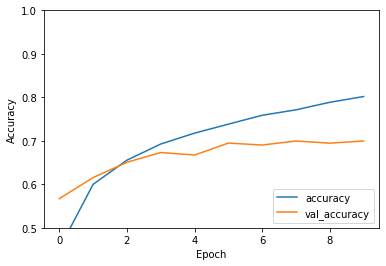

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Accuracy of this model is: %",test_acc*100)
